# ===================================================== PART A ==================================================

In [ ]:
# Load Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv("train.csv")

# Display the first 5 rows
df.head()


,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,Gar2,12500,6,2010,WD,Normal
2,2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,Gar2,0,3,2010,WD,Normal
3,3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,Gar2,0,6,2010,WD,Normal
4,4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,...,144,0,NaN,MnPrv,Gar2,0,1,2010,WD,Normal


In [2]:
# Identify object-type columns (categorical)
categorical_cols = df.select_dtypes(include="object").columns.tolist()

print("Categorical Columns:")
for col in categorical_cols:
    print(f"{col}: {df[col].unique()[:5]}...")  # showing only first 5 unique values for brevity


Categorical Columns:
MSZoning: ['RH' 'RL' 'RM' 'FV' 'C (all)']...
Street: ['Pave' 'Grvl']...
LotShape: ['Reg' 'IR1' 'IR2' 'IR3']...
LandContour: ['Lvl' 'HLS' 'Bnk' 'Low']...
Utilities: ['AllPub']...
LotConfig: ['Inside' 'Corner' 'FR2' 'CulDSac' 'FR3']...
LandSlope: ['Gtl' 'Mod' 'Sev']...
Neighborhood: ['NAmes' 'Gilbert' 'StoneBr' 'BrDale' 'NPkVill']...
Condition1: ['Feedr' 'Norm' 'PosN' 'RRNe' 'Artery']...
Condition2: ['Norm' 'Feedr' 'PosA' 'PosN' 'Artery']...
BldgType: ['1Fam' 'TwnhsE' 'Twnhs' 'Duplex' '2fmCon']...
HouseStyle: ['1Story' '2Story' 'SLvl' '1.5Fin' 'SFoyer']...
RoofStyle: ['Gable' 'Hip' 'Gambrel' 'Flat' 'Mansard']...
RoofMatl: ['CompShg' 'Tar&Grv' 'WdShake' 'WdShngl']...
Exterior1st: ['VinylSd' 'Wd Sdng' 'HdBoard' 'Plywood' 'MetalSd']...
Exterior2nd: ['VinylSd' 'Wd Sdng' 'HdBoard' 'Plywood' 'MetalSd']...
MasVnrType: [nan 'BrkFace' 'Stone' 'BrkCmn']...
ExterQual: ['TA' 'Gd' 'Ex' 'Fa']...
ExterCond: ['TA' 'Gd' 'Fa' 'Po' 'Ex']...
Foundation: ['CBlock' 'PConc' 'BrkTil' 'Stone

In [3]:
# Label Encoding
le = LabelEncoder()
df['Neighborhood_LE'] = le.fit_transform(df['Neighborhood'])

# Show original vs. label-encoded values
df[['Neighborhood', 'Neighborhood_LE']].head()


,Neighborhood,Neighborhood_LE
0,NAmes,12
1,NAmes,12
2,Gilbert,8
3,Gilbert,8
4,StoneBr,22


In [4]:
# One-Hot Encoding
df_onehot = pd.get_dummies(df, columns=['Neighborhood'], drop_first=True)

# Display the shape difference
print("Original shape with Label Encoding:", df.shape)
print("New shape with One-Hot Encoding:", df_onehot.shape)


Original shape with Label Encoding: (1459, 81)
New shape with One-Hot Encoding: (1459, 104)


# Label Encoding is useful for ordinal data (where order matters) or tree-based models.
# One-Hot Encoding is preferred for nominal data (no inherent order), especially for linear models.
# One-Hot Encoding increases dimensionality but avoids false ordinal assumptions.


# ===================================================== PART B ==================================================

In [6]:
# Use GrLivArea as predictor and LotArea as target
X = df[['GrLivArea']]
y = df['LotArea']

# Split into train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Output coefficients
print("Coefficient:", lr.coef_[0])
print("Intercept:", lr.intercept_)


Coefficient: 3.843788937744333
Intercept: 4078.8198046279904


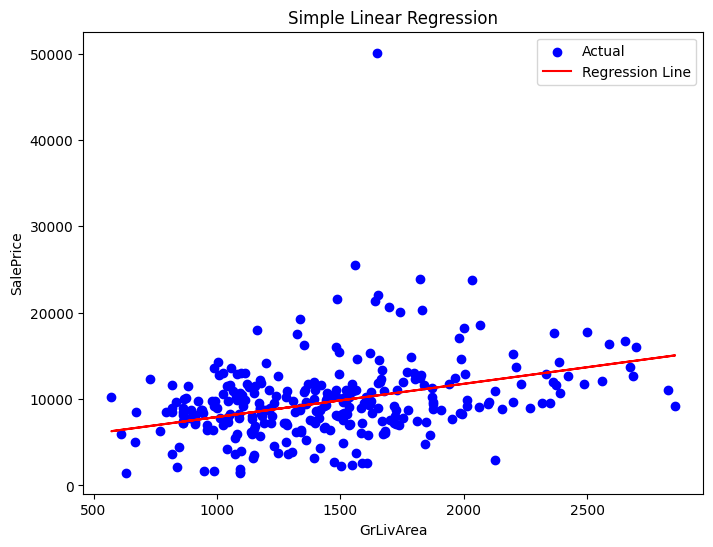

In [7]:
# Plot data and regression line
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label="Actual")
plt.plot(X_test, lr.predict(X_test), color='red', label="Regression Line")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()


In [8]:
# Predict on test set
y_pred = lr.predict(X_test)

# Display first 5 predictions
pd.DataFrame({'Actual': y_test.values[:5], 'Predicted': y_pred[:5]})


,Actual,Predicted
0,7200,7399.853447
1,9709,12150.776574
2,9757,7884.170853
3,6240,9237.184559
4,12671,13388.476612


# ===================================================== PART C ==================================================

In [9]:
# MAE
mae = mean_absolute_error(y_test, y_pred)
# MSE
mse = mean_squared_error(y_test, y_pred)
# RMSE
rmse = np.sqrt(mse)
# R2
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.4f}")


MAE: 2939.33
MSE: 19681494.32
RMSE: 4436.38
R-squared: 0.0966


In [11]:
# Interpretation
print("\n--- Interpretation ---")
if r2 >= 0.8:
    print("✅ R-squared is high, indicating the model explains a large portion of variance in SalePrice.")
elif 0.5 <= r2 < 0.8:
    print("⚠️ R-squared is moderate, indicating a decent but improvable fit.")
else:
    print("❌ R-squared is low, indicating the model does not explain much variance.")

if rmse < df['LotArea'].std():
    print("✅ RMSE is lower than the standard deviation of SalePrice, suggesting reasonable predictive power.")
else:
    print("⚠️ RMSE is high compared to target spread; predictions may not be reliable.")

print("MAE gives an average absolute error in units of SalePrice (currency), which helps assess average prediction deviation.")



--- Interpretation ---
❌ R-squared is low, indicating the model does not explain much variance.
✅ RMSE is lower than the standard deviation of SalePrice, suggesting reasonable predictive power.
MAE gives an average absolute error in units of SalePrice (currency), which helps assess average prediction deviation.


# ===================================================== PART D ==================================================

In [13]:
# Select multiple features
features = ['GrLivArea', 'OverallQual', 'YearBuilt']
X_multi = df[features]
y = df['LotArea']

# Train-test split
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y, test_size=0.2, random_state=42)


In [14]:
# Train model
mlr = LinearRegression()
mlr.fit(X_train_m, y_train_m)

# Output coefficients
coeff_df = pd.DataFrame({
    "Feature": features,
    "Coefficient": mlr.coef_
})
print(coeff_df)
print("Intercept:", mlr.intercept_)


       Feature  Coefficient
0    GrLivArea     4.742603
1  OverallQual  -541.963171
2    YearBuilt    -0.446831
Intercept: 6928.294920037164


In [15]:
# Predict
y_pred_m = mlr.predict(X_test_m)

# Metrics
mae_m = mean_absolute_error(y_test_m, y_pred_m)
mse_m = mean_squared_error(y_test_m, y_pred_m)
rmse_m = np.sqrt(mse_m)
r2_m = r2_score(y_test_m, y_pred_m)

print(f"MAE: {mae_m:.2f}")
print(f"MSE: {mse_m:.2f}")
print(f"RMSE: {rmse_m:.2f}")
print(f"R-squared: {r2_m:.4f}")


MAE: 2967.92
MSE: 19794017.37
RMSE: 4449.05
R-squared: 0.0914


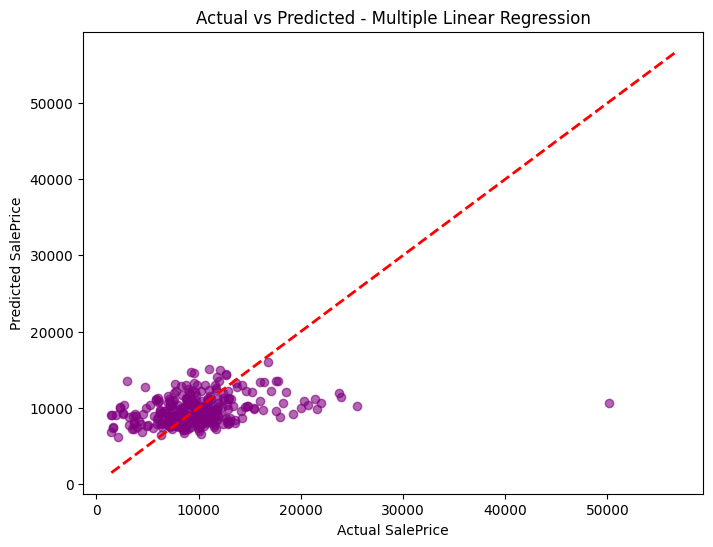

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_m, y_pred_m, color='purple', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted - Multiple Linear Regression")
plt.show()


# ===================================================== PART E ==================================================

# Key assumptions of linear regression:
# 1. Linearity: Relationship between independent and dependent variables is linear.
# 2. Homoscedasticity: Constant variance of residuals across all levels of predictors.
# 3. Normality of residuals: Residuals are normally distributed.
# 4. Independence: Observations and residuals are independent.


# Multicollinearity occurs when independent variables are highly correlated.
# It can inflate variances of coefficients and make interpretation unreliable.

# Detection:
# Variance Inflation Factor (VIF) - values >5 or 10 suggest high multicollinearity.

# Solution:
# - Drop correlated variables
# - Combine into single feature (e.g., PCA)


# Techniques for selecting features in regression:
# 1. Correlation Analysis: Remove highly correlated (redundant) variables.
# 2. Domain Knowledge: Use real-world knowledge to guide inclusion.
# 3. Feature Selection Algorithms: 
#    - Forward Selection: Start with none, add best at each step.
#    - Backward Elimination: Start with all, remove worst at each step.
#    - Recursive Feature Elimination (RFE)
